In [ ]:
!pip install tf_keras

In [ ]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('Admission_Predict_A3.csv')
data


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
# Extracting features and target variable
X = df.drop(['Serial No.', 'Chance of Admit'], axis=1)
y = df['Chance of Admit']

# Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Convert data to TensorFlow tensors
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train.values.reshape(-1, 1), dtype=tf.float32)

# Linear Regression
# Initialize weights and bias
W = tf.Variable(tf.random.normal(shape=(X_train.shape[1], 1)))
b = tf.Variable(tf.random.normal(shape=(1,)))

In [ ]:
# Define linear regression model
def linear_regression(X):
    return tf.matmul(X, W) + b

# Define mean squared error loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

In [ ]:
# Training the linear regression model
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tensor)
        loss = mean_squared_error(y_train_tensor, predictions)
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.numpy()}")


Epoch 50, Loss: 0.003526928136125207
Epoch 100, Loss: 0.0035268357023596764
Epoch 150, Loss: 0.0035267656203359365
Epoch 200, Loss: 0.0035267132334411144
Epoch 250, Loss: 0.003526673885062337
Epoch 300, Loss: 0.003526645014062524
Epoch 350, Loss: 0.0035266224294900894
Epoch 400, Loss: 0.0035266063641756773
Epoch 450, Loss: 0.0035265935584902763
Epoch 500, Loss: 0.0035265840124338865
Epoch 550, Loss: 0.0035265767946839333
Epoch 600, Loss: 0.003526571672409773
Epoch 650, Loss: 0.0035265677142888308
Epoch 700, Loss: 0.003526564920321107
Epoch 750, Loss: 0.0035265623591840267
Epoch 800, Loss: 0.003526560729369521
Epoch 850, Loss: 0.0035265590995550156
Epoch 900, Loss: 0.0035265586338937283
Epoch 950, Loss: 0.0035265579354017973
Epoch 1000, Loss: 0.0035265570040792227


In [ ]:
# Evaluate the trained linear regression model
y_pred_linear = linear_regression(X_test_tensor)

# Define a threshold for correctness
threshold = 0.1  # Adjust as needed

# Calculate accuracy based on the threshold
correct_predictions = tf.abs(y_pred_linear - y_test.values.reshape(-1, 1)) <= threshold
accuracy_linear = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(f"Accuracy: {accuracy_linear.numpy()}")


Accuracy: 0.8899999856948853


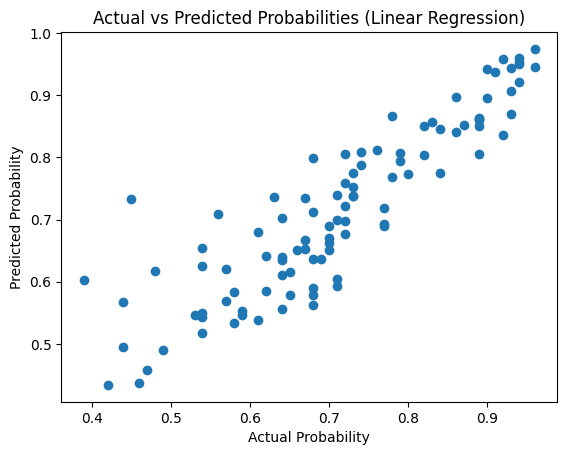

In [ ]:
# Plotting actual vs predicted probabilities
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Probability')
plt.ylabel('Predicted Probability')
plt.title('Actual vs Predicted Probabilities (Linear Regression)')
plt.show()

In [ ]:
# Logistic Regression with Binning
# Binning process
bins = [0.3, 0.5, 0.7, 1.0]
labels = ['Low', 'Medium', 'High']
y_binned = pd.cut(y, bins=bins, labels=labels)

# Convert labels to numerical values
y_binned = pd.get_dummies(y_binned)


In [ ]:
# Splitting into training and testing sets for logistic regression
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_scaled, y_binned, test_size=0.2, random_state=42)

# Convert data to TensorFlow tensors for logistic regression
X_train_tensor_log = tf.constant(X_train_log, dtype=tf.float32)
y_train_tensor_log = tf.constant(y_train_log.values, dtype=tf.float32)

# Logistic Regression
# Initialize weights and bias for logistic regression
W_log = tf.Variable(tf.random.normal(shape=(X_train_log.shape[1], 3)))
b_log = tf.Variable(tf.random.normal(shape=(3,)))

In [ ]:
# Define logistic regression model
def logistic_regression(X):
    return tf.nn.softmax(tf.matmul(X, W_log) + b_log)

# Define cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

# Stochastic Gradient Descent (SGD) optimizer for logistic regression
optimizer_log = tf.optimizers.SGD(learning_rate=0.01)


In [ ]:
# Training the logistic regression model
epochs_log = 100
for epoch in range(epochs_log):
    with tf.GradientTape() as tape_log:
        predictions_log = logistic_regression(X_train_tensor_log)
        loss_log = cross_entropy_loss(y_train_tensor_log, predictions_log)
    gradients_log = tape_log.gradient(loss_log, [W_log, b_log])
    optimizer_log.apply_gradients(zip(gradients_log, [W_log, b_log]))
    print(f"Epoch {epoch + 1}/{epochs_log}, Loss: {loss_log.numpy()}")


Epoch 1/100, Loss: 0.7925177216529846
Epoch 2/100, Loss: 0.7924983501434326
Epoch 3/100, Loss: 0.7924789190292358
Epoch 4/100, Loss: 0.7924595475196838
Epoch 5/100, Loss: 0.7924401760101318
Epoch 6/100, Loss: 0.7924208045005798
Epoch 7/100, Loss: 0.7924014329910278
Epoch 8/100, Loss: 0.7923820614814758
Epoch 9/100, Loss: 0.7923627495765686
Epoch 10/100, Loss: 0.7923434376716614
Epoch 11/100, Loss: 0.7923241257667542
Epoch 12/100, Loss: 0.7923048138618469
Epoch 13/100, Loss: 0.7922856211662292
Epoch 14/100, Loss: 0.792266309261322
Epoch 15/100, Loss: 0.7922470569610596
Epoch 16/100, Loss: 0.7922278642654419
Epoch 17/100, Loss: 0.792208731174469
Epoch 18/100, Loss: 0.7921894788742065
Epoch 19/100, Loss: 0.7921702861785889
Epoch 20/100, Loss: 0.7921510934829712
Epoch 21/100, Loss: 0.7921319603919983
Epoch 22/100, Loss: 0.7921127080917358
Epoch 23/100, Loss: 0.7920936346054077
Epoch 24/100, Loss: 0.7920745611190796
Epoch 25/100, Loss: 0.7920554280281067
Epoch 26/100, Loss: 0.79203629493713

In [ ]:
# Evaluate the trained logistic regression model
X_test_tensor_log = tf.constant(X_test_log, dtype=tf.float32)
y_pred_log = logistic_regression(X_test_tensor_log)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_test_log.values, axis=1), tf.argmax(y_pred_log, axis=1)), tf.float32))
print(f"Accuracy: {accuracy.numpy()}")

Accuracy: 0.7799999713897705


In [ ]:
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]  # Define different learning rates

# Train logistic regression model with different learning rates
for lr in learning_rates:
    optimizer_log = tf.optimizers.SGD(learning_rate=lr)
    for epoch in range(epochs_log):
        with tf.GradientTape() as tape_log:
            predictions_log = logistic_regression(X_train_tensor_log)
            loss_log = cross_entropy_loss(y_train_tensor_log, predictions_log)
        gradients_log = tape_log.gradient(loss_log, [W_log, b_log])
        optimizer_log.apply_gradients(zip(gradients_log, [W_log, b_log]))

    # Evaluate the trained logistic regression model
    y_pred_log = logistic_regression(X_test_tensor_log)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_test_log.values, axis=1), tf.argmax(y_pred_log, axis=1)), tf.float32))
    print(f"Learning Rate: {lr}, Accuracy: {accuracy.numpy()}")


Learning Rate: 0.01, Accuracy: 0.7799999713897705
Learning Rate: 0.05, Accuracy: 0.7900000214576721
Learning Rate: 0.1, Accuracy: 0.7900000214576721
Learning Rate: 0.2, Accuracy: 0.7599999904632568
Learning Rate: 0.5, Accuracy: 0.7599999904632568


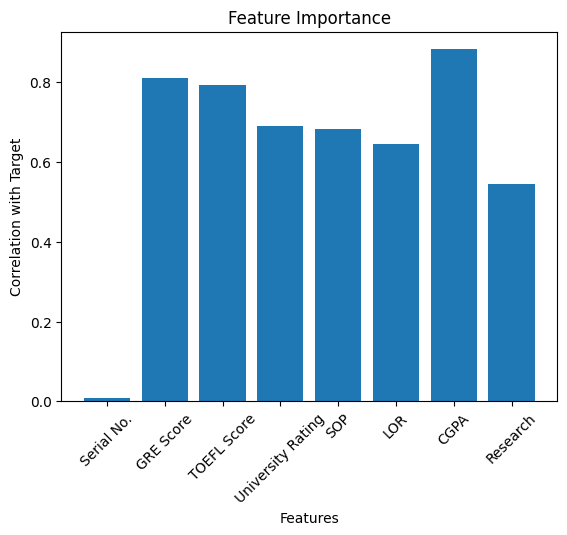

In [69]:
# Calculate correlation coefficients
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Chance of Admit'].drop('Chance of Admit')

# Create bar plot for feature importance
plt.bar(correlation_with_target.index, correlation_with_target.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

# Feature selection based on correlation coefficients (e.g., select top features)
top_features = correlation_with_target.abs().nlargest(5).index
X_selected = df[top_features]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear Regression with k-fold cross-validation
linear_reg_model = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression Mean MSE:", -linear_reg_scores.mean())


Linear Regression Mean MSE: 0.003974416673908526


In [ ]:
# Convert the target variable to a 1-dimensional array
y_binned_1d = np.argmax(y_binned.values, axis=1)

# Logistic Regression with k-fold cross-validation
logistic_reg_model = LogisticRegression()
logistic_reg_scores = cross_val_score(logistic_reg_model, X_scaled, y_binned_1d, cv=5, scoring='accuracy')
print("Logistic Regression Mean Accuracy:", logistic_reg_scores.mean())

Logistic Regression Mean Accuracy: 0.786


In [ ]:
# Train logistic regression model with sigmoid activation
for epoch in range(epochs_log):
    with tf.GradientTape() as tape_log:
        predictions_log = tf.nn.sigmoid(tf.matmul(X_train_tensor_log, W_log) + b_log)
        # Compute the sigmoid cross-entropy loss
        loss_log = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_train_binary, logits=predictions_log[:, 1]))
    gradients_log = tape_log.gradient(loss_log, [W_log, b_log])
    optimizer_log_sigmoid.apply_gradients(zip(gradients_log, [W_log, b_log]))

# Evaluate the trained logistic regression model with sigmoid activation
y_pred_log_sigmoid = tf.nn.sigmoid(tf.matmul(X_test_tensor_log, W_log) + b_log)
y_pred_binary = (y_pred_log_sigmoid.numpy()[:, 1] > 0.5).astype(np.float32)
accuracy_sigmoid = np.mean(y_pred_binary == y_test_binary)
print("Logistic Regression (Sigmoid) Accuracy:", accuracy_sigmoid)


Logistic Regression (Sigmoid) Accuracy: 0.91
